# Librerias

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# Lectura de datos

In [2]:
# Cargar el archivo .nc utilizando xarray
data_boyaca = xr.open_dataset('../data/data_boyaca_municipios.nc')
df_boyaca = data_boyaca.to_dataframe().reset_index()

# Leer el shapefile con los municipios de Boyacá
shape_boyaca_municipios = gpd.read_file('../shapes/shape_boyaca_municipios.shp')
df_shapefile_boyaca = pd.DataFrame(shape_boyaca_municipios)

# Seleccionar la variable de precipitación
precipitation = data_boyaca['precip']

In [3]:
df_boyaca['time'] = pd.to_datetime(df_boyaca['time'])
df_boyaca['year'] = df_boyaca['time'].dt.year
df_boyaca['month'] = df_boyaca['time'].dt.month

# Formatos archivos

In [ ]:
# Verificar los nombres de las variables disponibles
print(data_boyaca)

# Muestra el formato
print('shapefile : ',shape_boyaca_municipios)

# Diagrama de cajas y bigotes mensual para la precipitación de cada municipio

C:\Users\JimmyZea\AppData\Local\Temp\ipykernel_9368\1091431382.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['month'] = data_2022['month'].apply(lambda x: calendar.month_abbr[x])


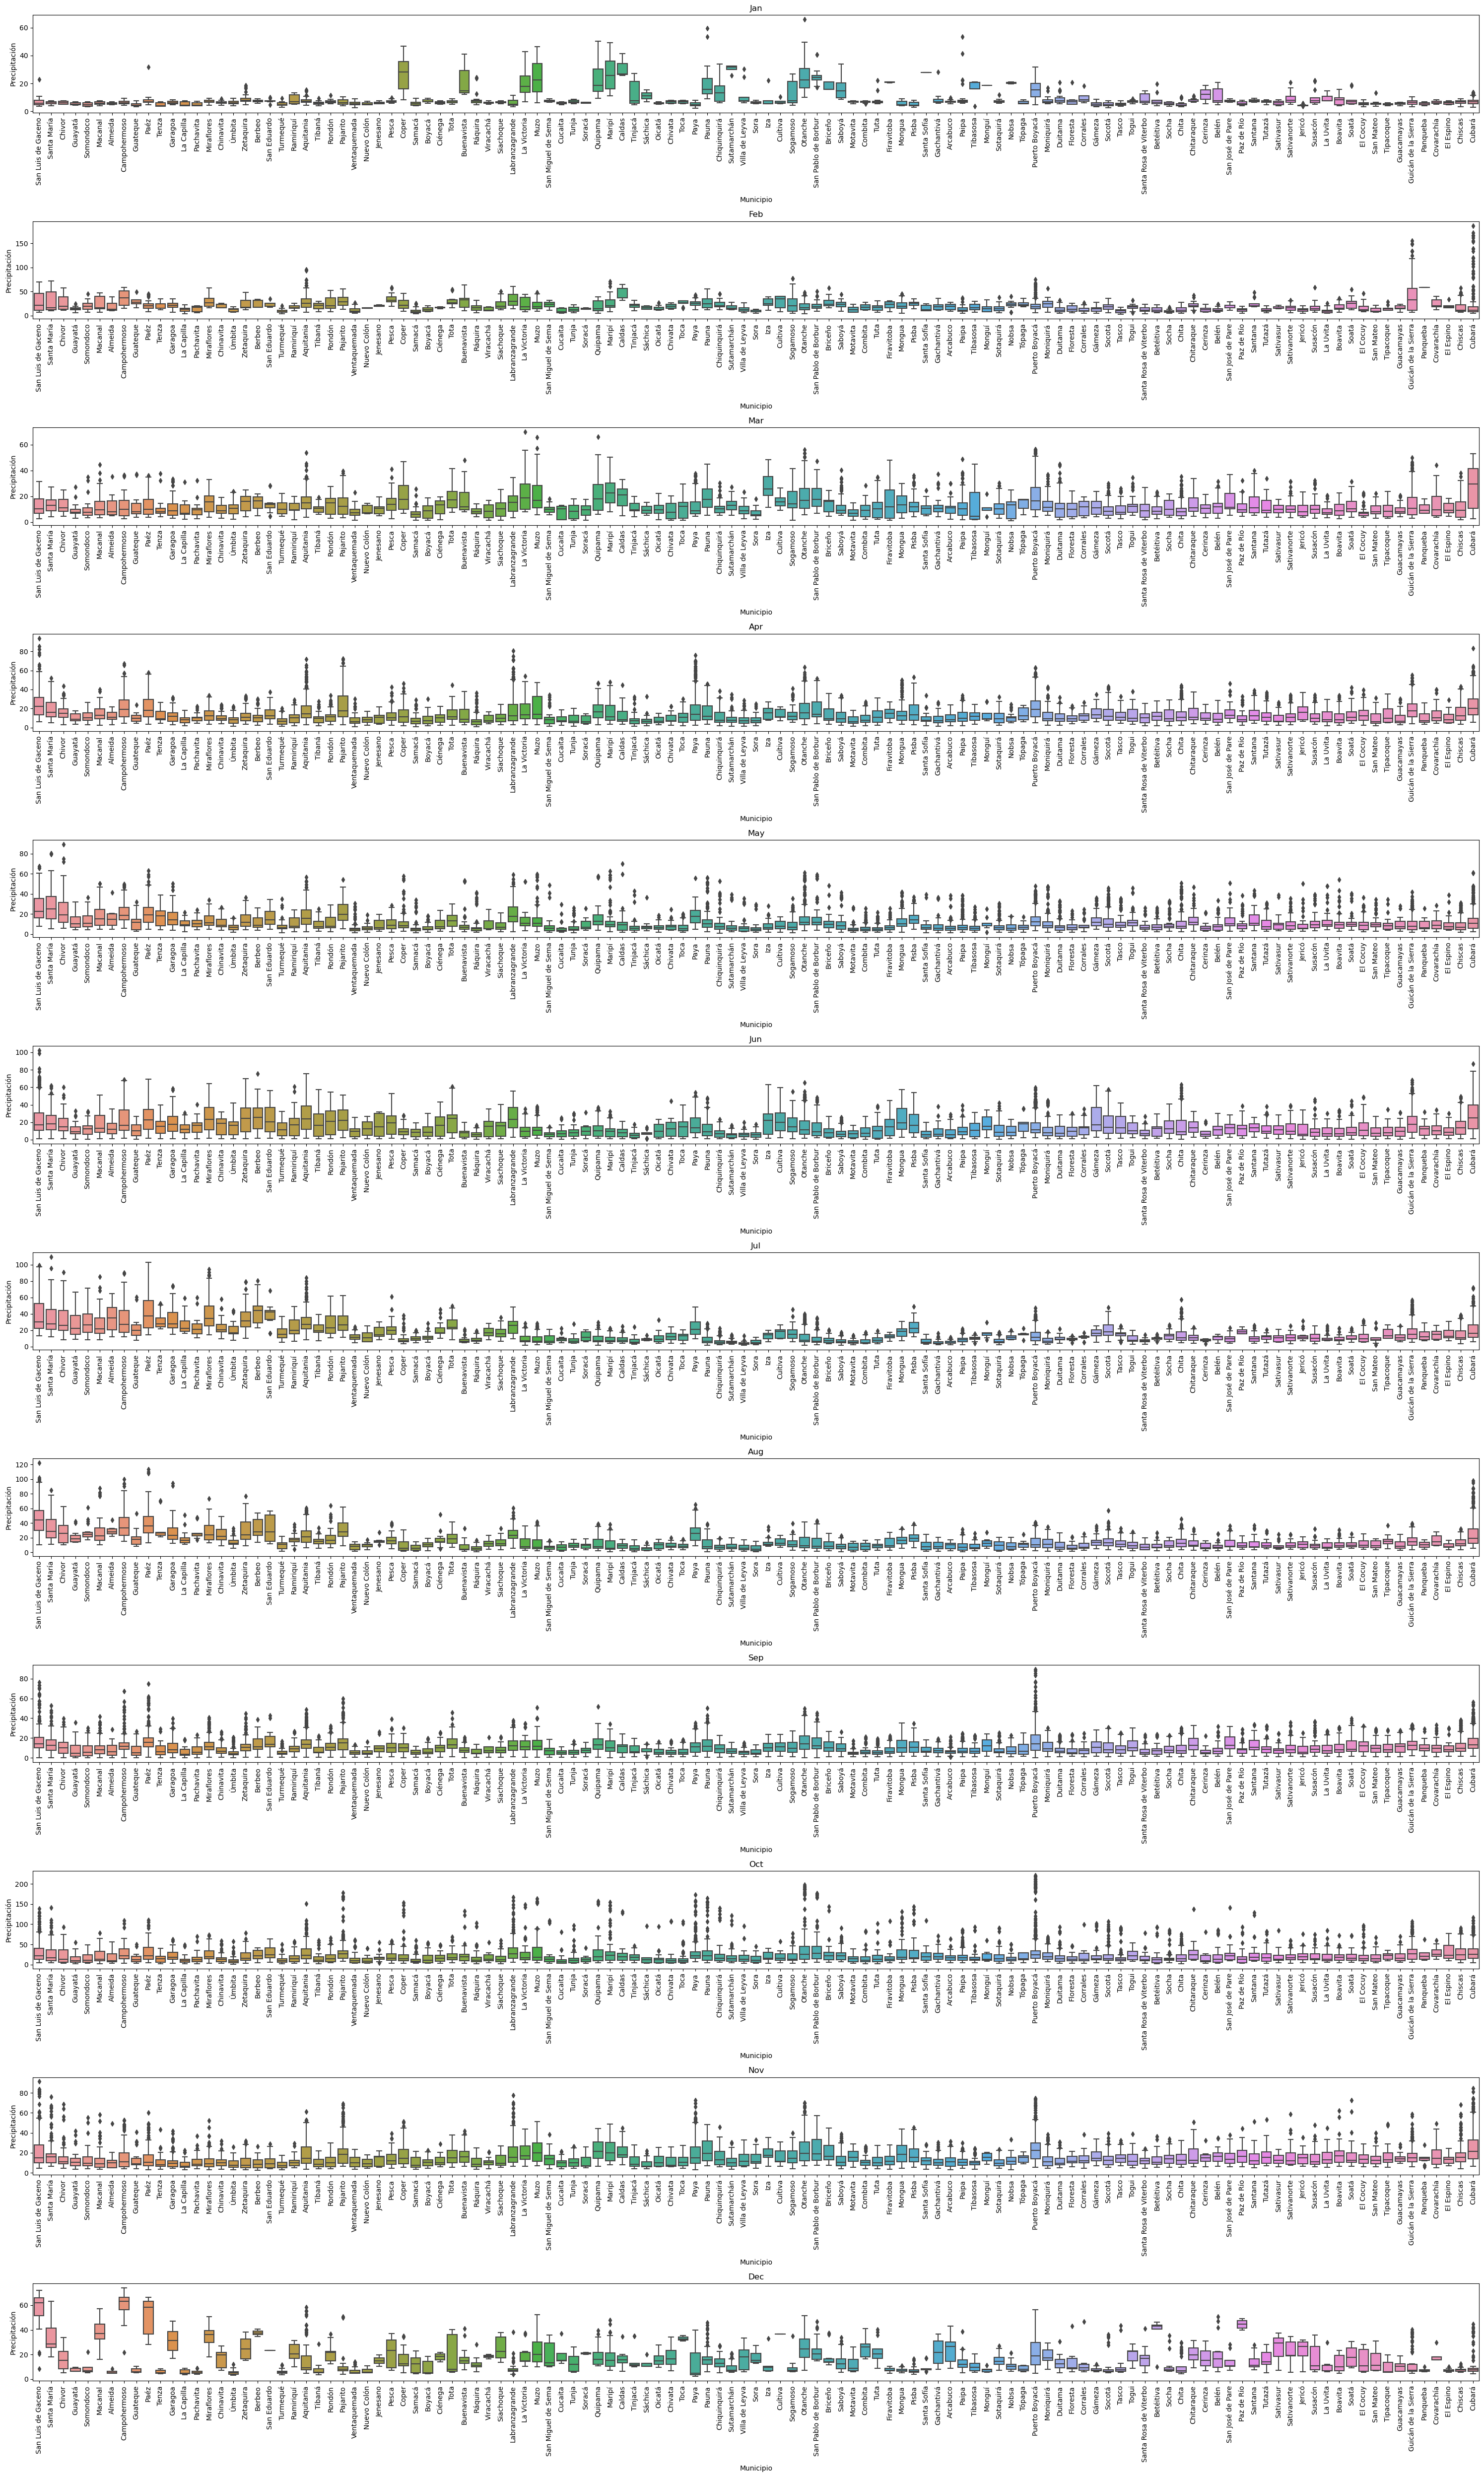

In [10]:
# Grafico boxplot precipitación mensual por municipio para el año 2022
import calendar
import seaborn as sns

# Filtrar los datos para el año 2022
data_2022 = df_boyaca[(df_boyaca['time'].dt.year == 2022) & (df_boyaca['precip'] != 0)]

# Cambiar el nombre del mes por su nombre
data_2022['month'] = data_2022['month'].apply(lambda x: calendar.month_abbr[x])

# Graficar la precipitación mensual por cada municipio
fig, ax = plt.subplots(12,1,figsize=(30,50))

for i, month in enumerate(data_2022['month'].unique()):
    sns.boxplot(x='municipio',y='precip',data=data_2022[data_2022['month'] == month],ax=ax[i])
    ax[i].set_title(month)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_ylabel('Precipitación')
    ax[i].set_xlabel('Municipio')
    
plt.tight_layout()
plt.show()

C:\Users\JimmyZea\AppData\Local\Temp\ipykernel_9368\1254387254.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['month'] = data_2022['month'].apply(lambda x: calendar.month_abbr[x])
c:\Users\JimmyZea\anaconda3\envs\project\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\JimmyZea\AppData\Local\Temp\ipykernel_9368\1254387254.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

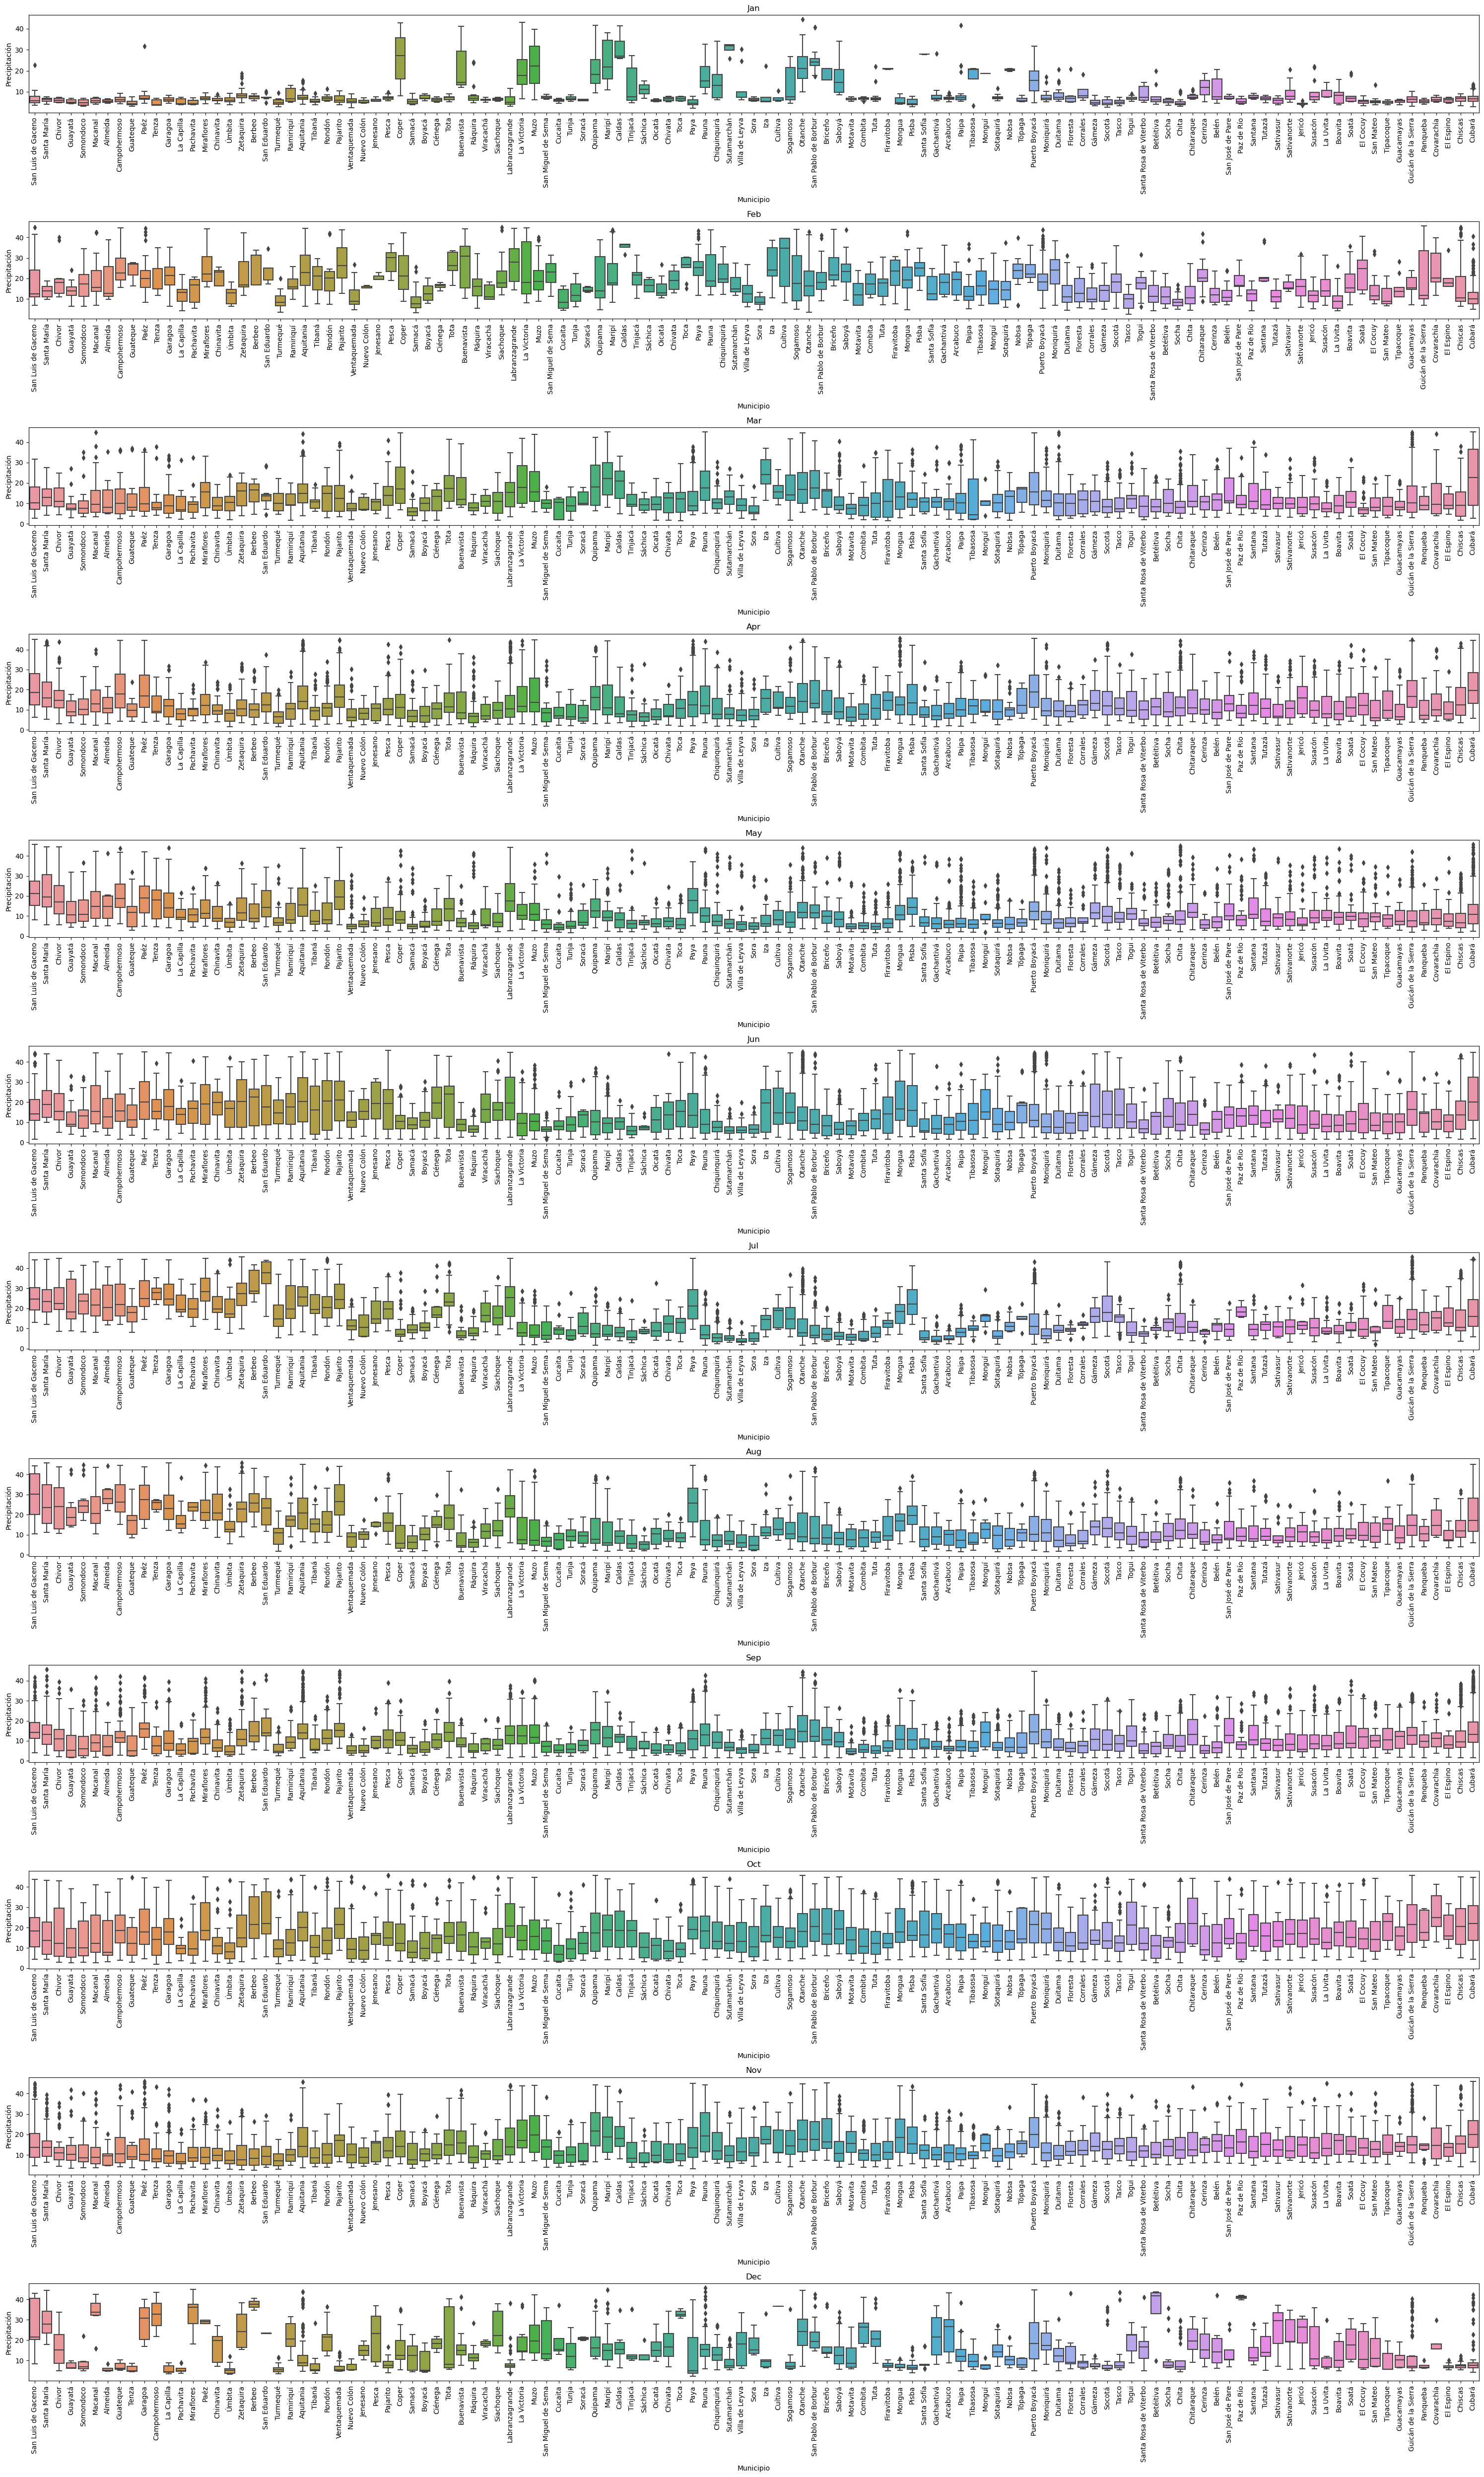

In [11]:
# Grafico boxplot precipitación mensual por municipio para el año 2022
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer

# Filtrar los datos para el año 2022
data_2022 = df_boyaca[(df_boyaca['time'].dt.year == 2022) & (df_boyaca['precip'] != 0)]

# Cambiar el nombre del mes por su nombre
data_2022['month'] = data_2022['month'].apply(lambda x: calendar.month_abbr[x])

# Tratamiento de outliers con Isolation Forest
outlier_detector = IsolationForest(contamination=0.05)
outliers = outlier_detector.fit_predict(data_2022[['precip']])
data_2022['outlier'] = outliers

# Imputación de valores atípicos con KNN
knn_imputer = KNNImputer(n_neighbors=5)
data_2022['precip'] = knn_imputer.fit_transform(data_2022[['precip']])

# Graficar la precipitación mensual por cada municipio
fig, ax = plt.subplots(12, 1, figsize=(30, 50))

for i, month in enumerate(data_2022['month'].unique()):
    sns.boxplot(x='municipio', y='precip', data=data_2022[(data_2022['month'] == month) & (data_2022['outlier'] != -1)], ax=ax[i])
    ax[i].set_title(month)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_ylabel('Precipitación')
    ax[i].set_xlabel('Municipio')

plt.tight_layout()
plt.show()

In [6]:
# Aumentar limite vertical de pandas
pd.set_option('display.max_rows', 1000)
# Mostrar el describe de la precipitación por municipio
data_2022.groupby('municipio')['precip'].describe()

count      mean        std  min  25%       50%  \
municipio                                                                 
Almeida                  365.0  5.181288  10.463322  0.0  0.0  0.000000   
Aquitania              11315.0  6.579161  12.617746  0.0  0.0  0.000000   
Arcabuco                1460.0  4.334645   7.145720  0.0  0.0  0.000000   
Belén                   1825.0  4.278623   8.120753  0.0  0.0  0.000000   
Berbeo                   730.0  6.143585  12.336711  0.0  0.0  0.000000   
Betéitiva               1460.0  3.662282   7.753140  0.0  0.0  0.000000   
Boavita                 2555.0  3.869374   7.610786  0.0  0.0  0.000000   
Boyacá                  1095.0  3.423029   6.368747  0.0  0.0  0.000000   
Briceño                  730.0  6.965246  11.960534  0.0  0.0  0.000000   
Buenavista              1095.0  6.004568  11.174999  0.0  0.0  0.000000   
Caldas                   730.0  6.297476  12.043092  0.0  0.0  0.000000   
Campohermoso            3650.0  8.094679  14.590343  0.0  0.0  0.000000   
Cerinza                  365.0  3.902722   7.573914  0.0  0.0  0.000000   
Chinavita               1460.0  4.169497   8.233281  0.0  0.0  0.000000   
Chiquinquirá            2190.0  5.402977   9.987926  0.0  0.0  0.000000   
Chiscas                 8395.0  4.581401   9.064126  0.0  0.0  0.000000   
Chita                   6935.0  3.717788   8.025812  0.0  0.0  0.000000   
Chitaraque              1095.0  8.000451  11.006021  0.0  0.0  3.130935   
Chivata                  730.0  3.799947   8.233928  0.0  0.0  0.000000   
Chivor                  1460.0  7.194467  13.433983  0.0  0.0  0.000000   
Ciénega                  730.0  4.177556   8.227817  0.0  0.0  0.000000   
Combita                 1825.0  3.826106   6.810965  0.0  0.0  0.000000   
Coper                   2190.0  6.657389  12.005106  0.0  0.0  0.000000   
Corrales                 730.0  3.771617   7.748591  0.0  0.0  0.000000   
Covarachía              1095.0  5.252045   9.303679  0.0  0.0  0.000000   
Cubará                 14965.0  7.049733  14.025001  0.0  0.0  0.000000   
Cucaita                  730.0  2.959037   5.915289  0.0  0.0  0.000000   
Cuítiva                  365.0  4.762610   9.196482  0.0  0.0  0.000000   
Duitama                 2920.0  4.197173   7.585120  0.0  0.0  0.000000   
El Cocuy                2555.0  3.993765   8.236908  0.0  0.0  0.000000   
El Espino                730.0  3.823010   7.952790  0.0  0.0  0.000000   
Firavitoba              1095.0  4.010695   8.364069  0.0  0.0  0.000000   
Floresta                1095.0  3.479795   6.570415  0.0  0.0  0.000000   
Gachantivá              1460.0  4.727777   7.830667  0.0  0.0  0.000000   
Garagoa                 2190.0  5.683284  11.170697  0.0  0.0  0.000000   
Guacamayas              1095.0  3.820685   7.424869  0.0  0.0  0.000000   
Guateque                 730.0  4.067292   8.333868  0.0  0.0  0.000000   
Guayatá                  730.0  4.705442   8.879206  0.0  0.0  0.000000   
Guicán de la Sierra    10585.0  5.361924  11.181561  0.0  0.0  0.000000   
Gámeza                  1460.0  4.243594   9.467564  0.0  0.0  0.000000   
Iza                      730.0  4.459279   9.030769  0.0  0.0  0.000000   
Jenesano                 365.0  3.839438   7.574932  0.0  0.0  0.000000   
Jericó                  1095.0  3.322378   7.540641  0.0  0.0  0.000000   
La Capilla               730.0  3.317979   7.224194  0.0  0.0  0.000000   
La Uvita                1825.0  3.376534   7.159246  0.0  0.0  0.000000   
La Victoria              730.0  8.888631  14.320597  0.0  0.0  1.744611   
Labranzagrande          6935.0  6.832582  13.621677  0.0  0.0  0.000000   
Macanal                 2555.0  6.069426  11.550533  0.0  0.0  0.000000   
Maripí                  2190.0  7.722451  13.554569  0.0  0.0  0.000000   
Miraflores              3285.0  6.383796  12.394257  0.0  0.0  0.000000   
Mongua                  4745.0  4.891985  10.276203  0.0  0.0  0.000000   
Monguí                   365.0  4.247750   8.02073

In [ ]:
# ver los datos del municipio de Tibasosa Puerto boyaca tiene 2869.116699 para el mes de enero
data_2022[data_2022['municipio'] == 'Tibasosa']

In [ ]:
import calendar

# Filtrar los datos para el año 2022
data_2022 = df_boyaca[df_boyaca['time'].dt.year == 2022]

# Obtener los datos de precipitación mensual para cada municipio
monthly_precipitation = data_2022['precip']

# Obtener la cantidad de municipios
num_municipios = len(shape_boyaca_municipios)

# Calcular el número de filas y columnas para los subplots
num_rows = (num_municipios - 1) // 7 + 1
num_cols = min(num_municipios, 7)

# Crear una figura y subplots para los municipios
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows), sharex=True, sharey=True)
fig.suptitle('Precipitación mensual en los municipios de Boyacá - 2022', fontsize=16)

# Ordenar los municipios alfabéticamente
shape_boyaca_municipios_sorted = shape_boyaca_municipios.sort_values('municipio')

# Recorrer cada municipio del shapefile
for i, (municipio, polygon) in enumerate(shape_boyaca_municipios_sorted.iterrows()):
    # Calcular las coordenadas del subplot actual
    row = i // num_cols
    col = i % num_cols

    # Crear un subplot para el municipio actual
    ax = axes[row, col]

    # Crear un DataFrame con los datos de precipitación para el municipio actual
    polygon_data = monthly_precipitation.loc[monthly_precipitation['municipio'] == polygon.municipio]

    # Verificar si el DataFrame no está vacío
    if not polygon_data.empty:
        # Crear el diagrama de cajas y bigotes utilizando Seaborn
        sns.boxplot(data=polygon_data, x=polygon_data.index.month, y='precip', ax=ax)

        # Mostrar los valores de precipitación en los subplots
        sns.stripplot(data=polygon_data, x=polygon_data.index.month, y='precip', color='black', size=2, ax=ax)

        # Obtener los nombres de los meses
        month_names = [calendar.month_name[month] for month in range(1, 13)]

        # Configurar el eje x con los nombres de los meses
        ax.set_xticklabels(month_names)

        # Configurar los límites del eje y para una mejor visualización
        ax.set_ylim(bottom=0)

    # Configurar el título y etiquetas de los ejes
    ax.set_title(polygon.municipio)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Precipitación (mm)')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Agregar una leyenda general para los subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')

# Mostrar la figura
plt.show()


# Tratamiento de datos anomalos

In [ ]:
import calendar
import seaborn as sns
import numpy as np

from scipy.stats.mstats import winsorize

# Filtrar los datos para el año 2022
data_2022 = data_boyaca.sel(time=slice('2022-01-01', '2022-12-31'))

# Obtener los datos de precipitación mensual para cada municipio
monthly_precipitation = data_2022['precip']

# Obtener la cantidad de municipios
num_municipios = len(shape_boyaca_municipios)

# Calcular el número de filas y columnas para los subplots
num_rows = (num_municipios - 1) // 7 + 1
num_cols = min(num_municipios, 7)

# Crear una figura y subplots para los municipios
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows), sharex=True, sharey=True)
fig.suptitle('Precipitación mensual en los municipios de Boyacá - 2022', fontsize=16)

# Ordenar los municipios alfabéticamente
shape_boyaca_municipios_sorted = shape_boyaca_municipios.sort_values('municipio')

# Recorrer cada municipio del shapefile
for i, (municipio, polygon) in enumerate(shape_boyaca_municipios_sorted.iterrows()):
    # Calcular las coordenadas del subplot actual
    row = i // num_cols
    col = i % num_cols

    # Crear un subplot para el municipio actual
    ax = axes[row, col]

    # Crear un DataFrame con los datos de precipitación para el municipio actual
    polygon_data = monthly_precipitation.sel(
        latitude=polygon.geometry.centroid.y,
        longitude=polygon.geometry.centroid.x,
        method='nearest'
    ).to_dataframe()

    # Verificar si el DataFrame no está vacío
    if not polygon_data.empty:
        # Calcular la desviación estándar
        std_dev = polygon_data['precip'].std()

        # Identificar los valores anómalos
        is_outlier = np.abs(polygon_data['precip'] - polygon_data['precip'].mean()) > 2 * std_dev

        # Winsorizar los valores anómalos
        polygon_data.loc[is_outlier, 'precip'] = winsorize(polygon_data.loc[is_outlier, 'precip'], limits=[0.05, 0.05])


        # Crear el diagrama de cajas y bigotes utilizando Seaborn
        sns.boxplot(data=polygon_data, x=polygon_data.index.month, y='precip', ax=ax)

        # Mostrar los valores de precipitación en los subplots
        sns.stripplot(data=polygon_data, x=polygon_data.index.month, y='precip', color='black', size=2, ax=ax)

        # Obtener los nombres de los meses
        month_names = [calendar.month_name[month] for month in range(1, 13)]

        # Configurar el eje x con los nombres de los meses
        ax.set_xticklabels(month_names)

        # Configurar los límites del eje y para una mejor visualización
        ax.set_ylim(bottom=0)

    # Configurar el título y etiquetas de los ejes
    ax.set_title(polygon.municipio)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Precipitación (mm)')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Agregar una leyenda general para los subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')

# Mostrar la figura
plt.show()


# Mapa de calor del promedio de la precipitación mensual para cada año

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la precipitación mensual por año
monthly_precipitation_per_year = df_boyaca.groupby(['year','month'])['precip'].sum().reset_index()

# Rellenar los meses faltantes con valores nulos
monthly_precipitation_per_year = monthly_precipitation_per_year.pivot_table(index='month', columns='year', values='precip')

# Crear el mapa de calor
plt.figure(figsize=(43, 6))

sns.heatmap(monthly_precipitation_per_year, cmap='YlGnBu', cbar=True, annot=True, fmt=".0f")

# Configurar los ejes y etiquetas
plt.xlabel('Año')
plt.ylabel('Meses')
plt.title('Precipitación mensual por año')
plt.yticks(np.arange(12)+0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0, fontsize=10)

# Mostrar la figura
plt.show()

In [ ]:
# Grafico con los poligonos ordenados
# Crear una figura y un eje
fig, ax = plt.subplots()
fig.set_size_inches(22, 13)

for i, polygon in enumerate(shape_boyaca_municipios.geometry):
    x, y = polygon.exterior.xy
    ax.plot(x, y)
    centroid = polygon.centroid
    ax.annotate(str(i+1), (centroid.x, centroid.y), textcoords="offset points", xytext=(0,0), ha='center', fontsize=8)

# Etiquetas de leyenda
etiquetas_leyenda = [f"{i+1}: {shape_boyaca_municipios.iloc[i]['municipio']}" for i in range(len(shape_boyaca_municipios))]

# Agregar la leyenda al gráfico
ax.legend(labels=etiquetas_leyenda, fontsize=10.5, ncol=3, loc='center right')
# Agrandar el eje x para que quepa la leyenda
ax.set_xlim(right=-70)

# Mostrar el gráfico
plt.show()


In [ ]:
import calendar
import locale

def plot_precipitation_data(precipitation, shape_boyaca_municipios, year):
    # Configurar el idioma local en español
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

    # Seleccionar un año específico
    pr_year = precipitation.sel(time=str(year))

    # Crear la cuadrícula de subtramas
    fig, axes = plt.subplots(3, 4, figsize=(12, 9), sharex=True, sharey=True)

    # Iterar sobre los meses
    for month, ax in zip(range(1, 13), axes.flat):
        # Seleccionar el mes específico
        pr_month = pr_year.sel(time=slice(f'{year}-{month:02}-01', f'{year}-{month:02}-{calendar.monthrange(year, month)[1]}'))

        # Obtener el nombre del mes en español
        month_name = calendar.month_name[month].capitalize()

        # Calcular el promedio de precipitación para cada punto
        precip_avg = pr_month.mean(dim='time')

        # Convertir a valores normales para el trazado
        x = precip_avg.longitude.values
        y = precip_avg.latitude.values
        xx, yy = np.meshgrid(x, y)

        # Plot del mapa de calor en la subtrama actual
        im = ax.pcolormesh(xx, yy, precip_avg.values, shading='auto', cmap='rainbow')
        shape_boyaca_municipios.plot(ax=ax, color='none', edgecolor='k')
        ax.set_title(f'Mes: {month_name}')

    # Ajustar los espacios entre las subtramas
    plt.tight_layout()

    # Agregar una barra de color común para todos los mapas de calor
    cax = fig.add_axes([1, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cax)

    # Mostrar la figura
    plt.show()

# Uso del código
year = 2010
plot_precipitation_data(precipitation, shape_boyaca_municipios, year)


1. Gráfico de Análisis de Tendencias:
   - En este gráfico, se muestra la precipitación promedio a lo largo del tiempo en el área de Boyacá.
   - La línea azul representa el promedio de la precipitación en función del tiempo.
   - La línea roja discontinua indica la tendencia de la precipitación a lo largo del tiempo, calculada mediante una regresión lineal.
   - Si la línea roja tiene una pendiente positiva, indica un aumento en la precipitación a medida que pasa el tiempo, mientras que una pendiente negativa indica una disminución en la precipitación.

2. Gráfico de Anomalías y Variabilidad Interanual:
   - Este gráfico muestra las anomalías de precipitación y la variabilidad interanual en el área de Boyacá.
   - Las anomalías de precipitación se calculan restando el promedio anual de la precipitación de cada año individual.
   - El gráfico muestra la media de estas anomalías a lo largo del tiempo.
   - Los valores positivos indican que la precipitación en un año determinado fue superior al promedio anual, mientras que los valores negativos indican una precipitación por debajo del promedio.

3. Gráfico de Estacionalidad de la Precipitación:
   - Este gráfico representa la estacionalidad de la precipitación en el área de Boyacá.
   - Se calcula el promedio mensual de la precipitación.
   - Cada punto en el gráfico de dispersión representa el promedio mensual de la precipitación en un determinado mes a lo largo del tiempo.
   - Este gráfico nos permite identificar patrones estacionales en la precipitación. Por ejemplo, si hay una concentración de puntos más altos en ciertos meses, indica una estacionalidad marcada en esos meses.




In [ ]:
# Convertir las fechas a tipo np.datetime64
data_boyaca['time'] = data_boyaca.time.astype('datetime64[ns]')

# Análisis de tendencias
trends = np.polyfit(data_boyaca.time.values.astype(float), data_boyaca.precip.mean(dim=('latitude', 'longitude')).values, deg=1)
trend_line = np.polyval(trends, data_boyaca.time.values.astype(float))

# Anomalías y variabilidad interanual
annual_mean = data_boyaca.precip.groupby('time.year').mean(dim='time')
anomalies = data_boyaca.precip.groupby('time.year') - annual_mean
anomalies_mean = anomalies.mean(dim=('latitude', 'longitude'))

# Estacionalidad
monthly_mean = data_boyaca.precip.groupby('time.month').mean(dim='time')
seasonal_mean = monthly_mean.mean(dim='month')

# Correlaciones espaciales
correlation = np.corrcoef(data_boyaca.precip.mean(dim='time').values.reshape(-1), rowvar=False)

# Visualización de datos
plt.figure(figsize=(12, 6))
data_boyaca.precip.mean(dim=('latitude', 'longitude')).plot(label='Promedio')
plt.plot(data_boyaca.time, trend_line, 'r--', label='Tendencia')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Precipitación')
plt.title('Análisis de tendencias')

plt.figure(figsize=(12, 6))
anomalies_mean.plot()
plt.xlabel('Año')
plt.ylabel('Anomalía de Precipitación')
plt.title('Anomalías y variabilidad interanual')

# Calcular el promedio mensual
monthly_mean = data_boyaca.precip.resample(time='1M').mean()

# Obtener los valores de tiempo y precipitación promedio mensual
time_values = monthly_mean.time.values
precipitation_values = monthly_mean.mean(dim=('latitude', 'longitude')).values

# Gráfico de dispersión con NumPy array
plt.figure(figsize=(8, 6))
plt.scatter(time_values, precipitation_values, marker='o') # type: ignore
plt.xlabel('Tiempo')
plt.ylabel('Precipitación Promedio')
plt.title('Estacionalidad de la Precipitación')

plt.show()

# Calcular el promedio de precipitación en todo el periodo
mean_precipitation = data_boyaca.precip.mean(dim=('latitude', 'longitude'))

# Crear histograma de precipitación
plt.figure(figsize=(8, 6))
plt.hist(mean_precipitation, bins=20, edgecolor='black')
plt.xlabel('Precipitación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precipitación')
plt.show()


